In [1]:
%pylab inline
import pandas as pd
# csv files for answer responses
gdrive_path = "/Users/dorislee/Google Drive/Turn/user_study/evaluation_study/transcription_and_analysis/"

Populating the interactive namespace from numpy and matplotlib


In [2]:
user_task =  pd.read_csv(gdrive_path+"UserTaskAssignment.csv")

In [3]:
%load_ext autoreload
%autoreload 2
from paper_visualization import *

# Interested Retrieval

user_click_data.csv generated by running Parsing User Study Clickstream.ipynb

In [4]:
retreival = pd.read_csv(gdrive_path+"user_click_data.csv")

In [5]:
from tabulate import tabulate
import tabulate as T
del(T.LATEX_ESCAPE_RULES[u'\\'])

Equal weighting for interested + uninterested, 0 for no selection

In [6]:
def getDataset(x):
    if 'A' in x:
        return "Police"
    else:
        return "Autism"

In [7]:
retreival["dataset"]=retreival["task"].apply(getDataset)

In [8]:
retreival.loc[retreival["interested"]=="unselected","retreival score"]=0
retreival.loc[retreival["interested"]=="interested","retreival score"]=1
retreival.loc[retreival["interested"]=="not interested","retreival score"]=-1
# retreival score, the higher the better, kind of like a relevance score
relevance = retreival.groupby(["dataset","visualization"]).sum()["retreival score"].reset_index().rename(columns={"retreival score":"relevance score"})
retreival = retreival.merge(relevance)
retreival["result_score"]=retreival["retreival score"]*retreival["relevance score"]

In [36]:
retreival["algo"] = retreival['task'].apply(lambda x: int(x[1]))

In [9]:
retreival["Condition"] = retreival["task"].apply(lambda x:{1:"Storyboard",2:"Cluster",3:"BFS"}[int(x[1])])

In [13]:
retreival.groupby(["Condition","task"]).count()

user  visualization  interested  dataset  retreival score  \
Condition  task                                                              
BFS        A3      60             60          60       60               60   
           B3      60             60          60       60               60   
Cluster    A2      60             60          60       60               60   
           B2      60             60          60       60               60   
Storyboard A1      60             60          60       60               60   
           B1      60             60          60       60               60   

                 relevance score  result_score  
Condition  task                                 
BFS        A3                 60            60  
           B3                 60            60  
Cluster    A2                 60            60  
           B2                 60            60  
Storyboard A1                 60            60  
           B1                 60            60

In [35]:
retreival.groupby(["interested","Condition"]).count()["user"]#.reset_index()[["interested","Condition","user"]]

interested      Condition 
interested      BFS           61
                Cluster       51
                Storyboard    66
not interested  BFS           20
                Cluster       22
                Storyboard    10
unselected      BFS           39
                Cluster       47
                Storyboard    44
Name: user, dtype: int64

In [34]:
retreival.groupby(["interested","dataset","Condition"]).count()["user"]#.reset_index()[["interested","Condition","user"]]

interested      dataset  Condition 
interested      Autism   BFS           29
                         Cluster       31
                         Storyboard    44
                Police   BFS           32
                         Cluster       20
                         Storyboard    22
not interested  Autism   BFS           11
                         Cluster        5
                         Storyboard     5
                Police   BFS            9
                         Cluster       17
                         Storyboard     5
unselected      Autism   BFS           20
                         Cluster       24
                         Storyboard    11
                Police   BFS           19
                         Cluster       23
                         Storyboard    33
Name: user, dtype: int64

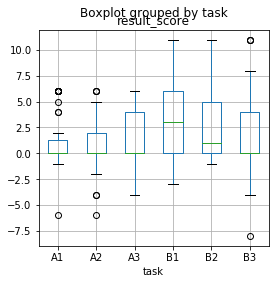

In [15]:
retreival.boxplot("result_score",by="task")

In [43]:
retreival["interested"].unique()

array(['unselected', 'interested', 'not interested'], dtype=object)

In [50]:
retreival.head()

,user,visualization,interested,task,dataset,retreival score,relevance score,result_score,Condition,algo
0,1,overall,unselected,A1,Police,0.0,6.0,0.0,Storyboard,1
1,10,overall,interested,A2,Police,1.0,6.0,6.0,Cluster,2
2,11,overall,interested,A3,Police,1.0,6.0,6.0,BFS,3
3,12,overall,interested,A3,Police,1.0,6.0,6.0,BFS,3
4,13,overall,interested,A1,Police,1.0,6.0,6.0,Storyboard,1


In [99]:
verbose = retreival[retreival["interested"]!="unselected"].groupby("user").count().reset_index()[["user","visualization"]].rename(columns={"visualization":"verbose"})

In [116]:
counts = retreival[retreival["interested"]=="interested"].groupby(["task","user"]).count().reset_index()[["task","user","interested"]].merge(verbose)

In [117]:
disinterested_counts = retreival[retreival["interested"]=="not interested"].groupby(["task","user"]).count().reset_index()[["task","user","interested"]].rename(columns={"interested":"disinterested"})

In [118]:
total_counts = counts.merge(disinterested_counts)
total_counts["total"] = total_counts["interested"]+total_counts["disinterested"]

In [119]:
total_counts["normalized_interested"]=total_counts["interested"]/total_counts["total"]

In [120]:
total_counts["Condition"] = total_counts["task"].apply(lambda x:{1:"Storyboard",2:"Cluster",3:"BFS"}[int(x[1])])
total_counts.groupby("Condition").mean()

,user,interested,verbose,disinterested,total,normalized_interested
Condition,,,,,,
BFS,13.500000,4.666667,15.500000,3.333333,8.000000,0.571693
Cluster,11.285714,3.714286,14.571429,3.142857,6.857143,0.545522
Storyboard,7.800000,3.200000,10.400000,2.000000,5.200000,0.652222


In [121]:
counts["Condition"] = counts["task"].apply(lambda x:{1:"Storyboard",2:"Cluster",3:"BFS"}[int(x[1])])
counts["normalized_interested"] = counts["interested"]/counts["verbose"]

In [123]:
counts.groupby("Condition").mean()

,user,interested,verbose,normalized_interested
Condition,,,,
BFS,10.25,5.083333,12.833333,0.420420
Cluster,9.50,4.250000,13.166667,0.339223
Storyboard,8.75,5.500000,12.333333,0.427177


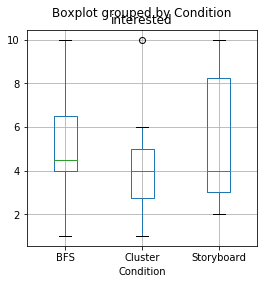

In [124]:
counts.boxplot("interested",by="Condition")